# Statistical Factors - PCA Model

### Data sourced from Practical Econometrics by Carol Alexander

In [21]:
from matplotlib import pyplot as plt
import numpy as np
import math
import pandas as pd

## Import datasets

In [2]:
df = pd.read_excel(open("Case Study_II.2_PCA Equity Factor Model..xls",'rb'),sheetname = 'DJIA Returns')

#drop missing data
df.dropna(how="all", inplace=True)

df.head()

,Date,AA,AIG,ATT,AXP,BA,CAT,CITI,DD,DIS,...,MMM,MO,MRK,MSFT,PFE,PG,UTX,VZ,WM,XON
0,2005-01-03 00:00:00,-0.013494,0.005363,-0.007165,-0.008253,-0.015698,-0.025356,0.001959,0.001486,0.001816,...,0.004002,-0.007632,-0.027831,0.000760,-0.016387,0.002056,-0.003562,-0.000530,0.010108,-0.023073
1,2005-01-04 00:00:00,-0.018055,0.003356,-0.010632,-0.015028,-0.019618,-0.011067,-0.008518,-0.021880,-0.010945,...,-0.008145,0.006941,-0.004089,0.003791,0.000000,-0.012591,-0.011565,-0.010117,-0.002470,-0.006780
2,2005-01-05 00:00:00,-0.006091,0.016464,0.005117,-0.009296,0.016610,-0.019388,0.012425,-0.013537,-0.005518,...,-0.012407,-0.001904,0.006805,-0.002273,-0.006710,0.010347,-0.007448,-0.001607,0.001331,-0.005167
3,2005-01-06 00:00:00,0.004403,0.001647,0.001275,-0.005107,-0.006651,0.014795,0.009701,0.000000,0.001474,...,0.009004,-0.007129,0.007096,-0.001138,0.000792,0.005041,0.000606,-0.002146,0.014147,0.012561
4,2005-01-07 00:00:00,0.010088,0.001793,-0.002978,-0.007495,-0.003241,-0.002194,-0.005810,-0.000880,-0.009995,...,0.010299,0.014723,-0.013901,-0.003042,0.000396,0.010374,-0.010760,-0.003498,-0.001124,-0.006570


In [3]:
df.columns

Index(['Date', 'AA', 'AIG', 'ATT', 'AXP', 'BA', 'CAT', 'CITI', 'DD', 'DIS',
       'GE', 'GM', 'HD', 'HON', 'HP', 'IBM', 'INT', 'JNJ', 'JPM', 'KO', 'MCD',
       'MMM', 'MO', 'MRK', 'MSFT', 'PFE', 'PG', 'UTX', 'VZ', 'WM', 'XON'],
      dtype='object')

### Get the cleaned return data matrix

X is the matrix which stored all the returns information.

In [ ]:
X = df.ix[0:327,1:].values

# print the input matrix size
print(len(X))
print(len(X[0]))
print(X[0])
print(X[-1])

## Implement PCA to find top 5 components

Standardizing: Whether to standardize the data prior to a PCA on the covariance matrix depends on the measurement scales of the original features. Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [5]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

Compute the returns covariance matrix. Then do eigendecomposition of it to get corresponding eigenvalues and eigenvectors.

In [6]:
cov_mat = np.cov(X_std.T)

print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[  1.00305810e+00   1.64911071e-01   2.60196082e-01   3.06337869e-01
    2.09892799e-01   3.87292894e-01   2.73509857e-01   4.07366269e-01
    1.75362573e-01   3.32095745e-01   1.41556511e-01   3.04218614e-01
    3.13844875e-01   5.31142389e-02   2.67594310e-01   2.12860616e-01
    9.61333779e-02   3.71881636e-01   3.03979337e-01   2.43705077e-01
    3.16501381e-01   2.05808446e-01   1.67098799e-01   2.83997523e-01
    2.04161235e-01   2.37720624e-01   3.37134637e-01   1.96352096e-01
    2.07289474e-01   4.04624952e-01]
 [  1.64911071e-01   1.00305810e+00   2.69201473e-01   3.84842267e-01
    2.00661905e-01   2.32799085e-01   3.85251943e-01   2.48709036e-01
    2.08589568e-01   3.49177889e-01   7.49687334e-02   3.53836319e-01
    2.52717145e-01   2.56770598e-01   2.51588004e-01   2.78234354e-01
    2.87848965e-01   4.19193684e-01   2.88894558e-01   2.29603447e-01
    2.32890069e-01   2.64005615e-01   1.50772057e-01   2.82909398e-01
    1.45053076e-01   3.12664048e-0

In [7]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[  1.66390062e-01   3.22116862e-01   1.92711303e-01  -1.25871214e-01
    2.68823349e-01  -8.22815122e-02   2.72083298e-02  -2.91953678e-02
   -1.50795748e-01  -1.07881480e-01  -7.49592050e-02   1.87602173e-01
   -2.63297377e-01  -5.49138463e-02   2.11192324e-01  -1.15042466e-01
   -1.23081968e-01   1.17254100e-01  -4.55752149e-02  -5.07196784e-02
    4.30827319e-01  -1.84845616e-01  -1.46586905e-01   3.27693745e-02
    4.37696603e-01  -1.99267410e-01  -1.41322878e-01  -3.42893041e-02
    3.52501974e-02   3.24162332e-03]
 [  1.71455081e-01  -9.35751756e-02  -1.91061350e-01   2.38307977e-01
   -7.09794290e-02  -2.65510583e-02  -1.96969050e-01  -5.84853573e-02
    3.41435248e-01  -1.85076328e-01   1.07962588e-01  -7.43789703e-02
    5.29699799e-02   5.18954745e-02  -6.05381031e-02   1.02578201e-01
   -1.56704259e-01   9.07874300e-03  -9.38531047e-02  -1.60872695e-02
   -1.81297487e-01  -1.60257521e-01  -2.56158641e-01  -1.81345467e-01
    2.42205702e-01  -3.00822656e-01  -1

### Check the eigenvectors are normalized, which means the 'length' of each eigenvector is 1.

In [10]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


### Sort the eigenvalues to find the largest ones.

In [11]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
9.34777061399
1.4729958232
1.38992822193
1.23429830624
1.11486487889
1.02147314656
1.00008545701
0.932356244128
0.924427545478
0.83322066259
0.826160619472
0.775082319517
0.769813082497
0.700994291007
0.66990452646
0.651815283401
0.639969681578
0.619035606685
0.574438395501
0.5419912904
0.520980632893
0.482194908853
0.472509578681
0.456973617125
0.433182976783
0.382137221361
0.373979533557
0.34915885979
0.320953593147
0.259046200557


### Show the cumulative explained variance

In [13]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [14]:
print(cum_var_exp)

[  31.06423771   35.95925432   40.5782231    44.68000711   48.38489345
   51.77942311   55.10287783   58.20125681   61.27328737   64.04222189
   66.78769468   69.36342556   71.92164587   74.25116958   76.47737669
   78.64347017   80.77019868   82.82735969   84.73631655   86.53744615
   88.26875374   89.87116975   91.44139975   92.9600011    94.39954209
   95.66944932   96.91224716   98.07256166   99.13914525  100.        ]


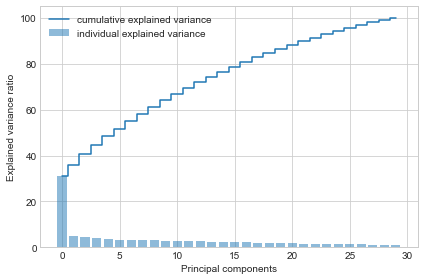

In [15]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(30), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(30), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

### Compute the projection matrix

In [16]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(30,1),
                      eig_pairs[1][1].reshape(30,1),
                      eig_pairs[2][1].reshape(30,1),
                      eig_pairs[3][1].reshape(30,1),
                      eig_pairs[4][1].reshape(30,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.16639006  0.32211686  0.1927113  -0.12587121  0.26882335]
 [ 0.17145508 -0.09357518 -0.19106135  0.23830798 -0.07097943]
 [ 0.18542506 -0.15439859 -0.28972545 -0.17012738  0.36918088]
 [ 0.21611698  0.0964137  -0.17382975  0.10482204  0.00964532]
 [ 0.15598084  0.08209099  0.06771821 -0.01282067 -0.21945703]
 [ 0.18811337  0.28457403  0.05409478  0.01244382  0.19062509]
 [ 0.21257872 -0.0270618  -0.14684262  0.33823156  0.08815612]
 [ 0.19952042  0.12206412  0.2128153  -0.09379671  0.02428167]
 [ 0.16691711 -0.1096662  -0.07363997 -0.00423031 -0.36897501]
 [ 0.23478085  0.04286603  0.03688401  0.18084271 -0.10259204]
 [ 0.09439604  0.09142121 -0.152928   -0.4907857  -0.06210001]
 [ 0.22075582  0.0669267  -0.05384212  0.04618953 -0.16555321]
 [ 0.19466875  0.12909334  0.02076395 -0.26762544 -0.10301376]
 [ 0.11726254 -0.20124698 -0.2353145  -0.33692184 -0.15804953]
 [ 0.18185478  0.042589   -0.19080565 -0.16756704 -0.21114821]
 [ 0.17521969 -0.06515841  0.00156762  0.014

In [17]:
Components = X_std.dot(matrix_w)

### Compute the top 5 components

In [18]:
print(Components)

[[-1.73865323 -0.02400423 -1.79697704  1.1546335  -1.30150477]
 [-4.71174261 -0.84030665  0.17255346  0.24802834 -0.8906269 ]
 [-1.09334326 -1.54044305 -0.90798499  1.07447989  0.30299864]
 ..., 
 [-0.17490021  2.325146    2.21489056  1.27657356  1.01454732]
 [ 1.88322749  0.41708002  1.01731935 -1.83538621 -2.0868074 ]
 [-0.67712418  1.50440686  1.81730828  1.03219074  1.2107981 ]]


##  Linear Regression

###  We want to evaulate the fit if we transform the data back to the original form. Do linear regression for a single column and compute R2

In [22]:
from sklearn import linear_model

In [23]:
lm = linear_model.LinearRegression()

In [25]:
target = X[:,0]
#target

In [26]:
lm.fit(Components,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
lm.coef_

array([ 0.0023846 ,  0.00461638,  0.00276182, -0.00180391,  0.00385261])

In [36]:
lm.intercept_

0.00044437846400780532

###  Do linear regression for all columns

In [76]:
lm = linear_model.LinearRegression()
result = {}
pred_result = {}
from sklearn.metrics import *

In [49]:
print(df.columns[1:])

Index(['AA', 'AIG', 'ATT', 'AXP', 'BA', 'CAT', 'CITI', 'DD', 'DIS', 'GE', 'GM',
       'HD', 'HON', 'HP', 'IBM', 'INT', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MO',
       'MRK', 'MSFT', 'PFE', 'PG', 'UTX', 'VZ', 'WM', 'XON'],
      dtype='object')


In [77]:
for i in range(len(df.columns[1:])):
    target = X[:,i]
    lm.fit(Components,target)
    coef = lm.coef_.tolist()
    intercept = lm.intercept_
    pred = lm.predict(Components)
    r2 = r2_score(target, pred)
    pred_result[df.columns[i + 1]] = pred
    result[df.columns[i + 1]] = coef + [intercept] + [r2*100]

### Derived returns

In [79]:
pred_result = pd.DataFrame(data = pred_result)
pred_result.head()

,AA,AIG,ATT,AXP,BA,CAT,CITI,DD,DIS,GE,...,MMM,MO,MRK,MSFT,PFE,PG,UTX,VZ,WM,XON
0,-0.015872,0.005281,-0.003895,0.000668,0.000006,-0.009009,0.001482,-0.010240,0.003685,-0.001270,...,-0.003061,-0.001194,-0.019645,-0.002605,-0.016550,-0.006711,-0.005209,-0.002831,0.001830,-0.013867
1,-0.018073,-0.008295,-0.009831,-0.011510,-0.006211,-0.018782,-0.007729,-0.012304,-0.004489,-0.008778,...,-0.007785,-0.006495,-0.004143,-0.008028,-0.005370,-0.007337,-0.012190,-0.010274,-0.005491,-0.016002
2,-0.012553,0.004633,0.002146,-0.000959,-0.004105,-0.008332,0.002758,-0.008168,-0.000791,-0.001789,...,-0.005806,-0.002963,-0.000437,0.000589,-0.000087,-0.000562,-0.005510,0.004028,-0.000794,-0.010807
3,0.005906,0.003090,0.001440,0.002953,0.002940,0.007671,0.003987,0.003469,-0.000620,0.003297,...,0.003355,0.001706,0.004870,0.002573,0.005037,0.004068,0.005271,0.000998,0.000884,0.005845
4,0.000603,-0.004194,-0.003503,-0.003242,0.000344,-0.000255,-0.002389,-0.000610,-0.002847,-0.001888,...,-0.000043,-0.001015,0.001844,-0.002267,0.000778,-0.000606,-0.000329,-0.004909,-0.002370,0.000872


#### Linear regression coefficient and R2 results

In [73]:
df_result = pd.DataFrame(data = result, index = ['coef_1', 'coef_2', 'coef_3', 'coef_4', 'coef_5', 'intercept', 'R^2'])
df_result

,AA,AIG,ATT,AXP,BA,CAT,CITI,DD,DIS,GE,...,MMM,MO,MRK,MSFT,PFE,PG,UTX,VZ,WM,XON
coef_1,0.002385,0.002207,0.001595,0.002279,0.002038,0.002975,0.001674,0.002305,0.001950,0.002034,...,0.001916,0.001844,0.001950,0.001813,0.002082,0.001665,0.002162,0.001747,0.001596,0.002258
coef_2,0.004616,-0.001204,-0.001328,0.001017,0.001072,0.004500,-0.000213,0.001410,-0.001281,0.000371,...,0.001614,0.000127,-0.006455,-0.001062,-0.005607,-0.001188,0.002696,-0.002298,-0.000286,0.003972
coef_3,0.002762,-0.002459,-0.002492,-0.001833,0.000885,0.000855,-0.001156,0.002459,-0.000860,0.000320,...,0.002036,0.000367,0.006502,-0.000445,0.005689,0.001636,0.001032,-0.003141,-0.000460,0.002586
coef_4,-0.001804,0.003067,-0.001464,0.001105,-0.000167,0.000197,0.002664,-0.001084,-0.000049,0.001567,...,0.000974,-0.000402,-0.002953,0.000260,-0.001340,0.000375,0.000862,-0.000871,0.001085,-0.001540
coef_5,0.003853,-0.000913,0.003176,0.000102,-0.002867,0.003015,0.000694,0.000281,-0.004311,-0.000889,...,-0.002035,-0.001947,0.001336,0.000517,0.000904,0.001153,0.000962,0.003096,-0.002239,0.003243
intercept,0.000444,-0.000061,0.000191,0.000216,0.001626,0.001505,0.000138,-0.000163,-0.000055,-0.000116,...,0.000194,0.000604,0.000423,0.000096,-0.000117,0.000161,0.000726,-0.000456,-0.000396,0.000801
R^2,56.165965,41.288232,65.884552,50.441686,29.672068,49.333450,60.150165,46.710523,43.616266,57.022268,...,43.933678,31.295006,66.686915,38.577778,67.632727,41.352544,50.561087,69.219804,35.250960,48.741407


If you want to see a specific column of the result above, you can print any one, like the example below.